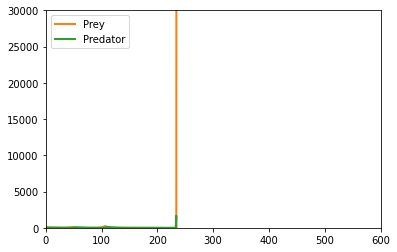

In [15]:
#Necessary plotting library matplotlib, along with the animation module
import matplotlib.pyplot as plt
from matplotlib import animation

#Set your constant values
alpha = 3
beta = .1
gamma = .8
delta = .03
#These will be the lists we pass to the graphing function
#Including the xs as a list even though they're just a range to keep the plotting function looking neat
x1,y1 = [0],[50]
x2,y2 = [0],[20]

#simulate out for 100 steps
for n in range(1000):
    new_y1 = y1[-1] + ((alpha - beta*y2[-1])*y1[-1])*.1
    new_y2 = y2[-1] + ((delta*y1[-1] - gamma)*y2[-1])*.1
    x1.append(n)
    y1.append(new_y1)
    x2.append(n)
    y2.append(new_y2)
    
#Now the graph related stuff, first off, set the x limits to make sure they're consistent
fig = plt.figure()
ax1 = plt.axes(xlim=(0, 600), ylim=(0,30000))

#create the line objects we'll reference later on
line, = ax1.plot([], [], lw=2)
labels = ['Prey','Predator']
lines = []
for index in range(2):
    lobj = ax1.plot([],[],lw=2)[0]
    lines.append(lobj)
    
#Here's an init function that the animation function will use to initialize the plot
def init():
    for index in range(2):
        line = lines[index]
        line.set_data([],[])
        line.set_label(labels[index])
    legend = plt.legend(loc='upper left')

    return lines + [legend]
#Here's the animating function that will be called for each frame
def animate(i):
    #We're just looking for the relevant slice of the x and y lists
    xlist = [x1[:i+1], x2[:i+1]]
    ylist = [y1[:i+1], y2[:i+1]]
    #And setting the data in the lines
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately.
        line.set_label(labels[lnum])
    legend = plt.legend(loc='upper left')
    return lines + [legend]

# call the animator. 'Frames' tells the function how many times to call the animation function
# Interval says how long to wait between frames and blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=500, interval=50, blit=False)
#plt.show()
#Matplotlib doesn't come with any of the writers to save down the animations
#Imagemagick is a good one for creating gifs
anim.save('lotka_volterra_test.gif', writer = 'imagemagick')

In [16]:

#Dash and related modules
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
#plotly graph objects to create the plot itself
import plotly.graph_objs as go

app= dash.Dash()
#Our dash will be very simple, just the graph
app.layout = html.Div([dcc.Graph(id='graph'),
                       #and four sliders for the paramaters
                      html.Div([html.Div(children='Alpha'),dcc.Slider(id='alpha',
                                     min=1,max=4,step=.05,marks = {1:'1',2:'2',3:'3',4:'4'},
                                     value=3)]),
                      html.Div([html.Div(children='Beta'),dcc.Slider(id='beta',
                                     min=0,max=2,step=.05,marks = {0:'0',1:'1',2:'2'},
                                     value=.1)]),
                      html.Div([html.Div(children='Gamma'),dcc.Slider(id='gamma',
                                     min=0,max=2,step=.05,marks = {0:'0',1:'1',2:'2'},
                                     value=.8)]),
                      html.Div([html.Div(children='Delta'),dcc.Slider(id='delta',
                                     min=0,max=1,step=.01,marks = {0:'0',.25:'.25',.5:'.5',.75:'.75',1:'1'},
                                     value=.05)])])

#Telling Dash that the sliders are inputs into the graph
@app.callback(Output('graph','figure'),
             [Input('alpha','value'),
             Input('beta','value'),
             Input('gamma','value'),
             Input('delta','value')])
#And this function takes the inputs, runs the model and plots the output
def update_figure(alpha,beta,gamma,delta):
    xs = [50]
    ys = [20]
    

    for n in range(1000):
        new_x = xs[-1] + ((alpha - beta*ys[-1])*xs[-1])*.01
        new_y = ys[-1] + ((delta*xs[-1] - gamma)*ys[-1])*.01
        xs.append(new_x)
        ys.append(new_y)
    
    data = [go.Scatter(x=list(range(0,1001)), y=xs, mode='lines', name='Prey'),
            go.Scatter(x=list(range(0,1001)), y=ys, mode='lines', name='Predator')]
    layout = go.Layout(title = f'Lotka-Volterra')
    return {'data':data,'layout':layout}


app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/tmp/ipykernel_77485/2288893096.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_77485/2288893096.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [24/Jun/2022 16:37:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2022 16:37:59] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_5_1m1656097753.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2022 16:37:59] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_5_1m1656097753.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2022 16:37:59] "GET /_dash-component-suites/dash/deps/react@16.v2_5_1m1656097753.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2022 16:37:59] "GET /_d

In [ ]:
import numpy as np
#this will come in handy later
def distance(coord_1,coord_2):
    return np.sqrt((coord_1[0]-coord_2[0])**2 + (coord_1[1]-coord_2[1])**2)

class individual:
  #each individual is instatiated with a location,
  #a status and a set of boundaries
    def __init__(self,coords,status,bounds,speed):
        self.coord = coords
        self.status = status
        self.bounds = bounds
        self.speed = speed
        self.time = 0
        self.removed = 0

    #in this example I imagine each indivual moving in a given direction
    #which we can change at any point in time
    def set_direction(self):
        angle = np.random.uniform(0,2*np.pi)
        x_direction = np.cos(angle)
        y_direction = np.sin(angle)

        self.x_direction = x_direction
        self.y_direction = y_direction
        
    #Every turn, the individual will updat their location
    def update_location(self):
        speed = self.speed
        bounds = self.bounds


        distance = speed*np.random.random()
        #What to do if they run up against the boundary of the region?
        if self.coord[0] + distance*self.x_direction < 0:
            new_x = -distance*self.x_direction-self.coord[0]
            self.x_direction = -self.x_direction
        elif self.coord[0] + distance*self.x_direction > bounds[0]:
            new_x = 2*bounds[0]-distance*self.x_direction - self.coord[0]
            self.x_direction = -self.x_direction
        else:
            new_x = self.coord[0] + distance*self.x_direction

        if self.coord[1] + distance*self.y_direction < 0:
            new_y = -distance*self.y_direction-self.coord[1]
            self.y_direction = -self.y_direction
        elif self.coord[1] + distance*self.y_direction > bounds[1]:
            new_y = 2*bounds[1]-distance*self.y_direction - self.coord[1]
            self.y_direction = -self.y_direction
        else:
            new_y = self.coord[1] + distance*self.y_direction

        self.coord = (new_x,new_y)
    
    #each individual has a certain chance to be infected by others
    #within a certain radius
    def transmission(self,others,radius,probability):
      #of course if they're already recoved it's moot
        if self.removed == 1:
            pass
        #and if they're already infected, they won't get infected again
        elif self.status == 1:
            #but we can track how long they've been infected
            self.time +=1
            #And put them into the 'removed' category
            if self.time == 175:
                self.status =2
                self.removed = 1
        else:
          #but if they're susceptible, 
            neighbor_count = 0
            for other in others:
            #then every infected person nearby increases the probability of transmission
                if other.status == 1:
                    if distance(self.coord,other.coord) < radius:
                        neighbor_count +=1
            if sum([1 for x in np.random.random(neighbor_count) if x >probability]) > 0:
                self.status = 1

In [ ]:
#setting the global variables up front
bounds = (10,10)
radius = .2
probability = .2

everyone = []
#five infected individuals, at random coordinates
for n in range(5):
    everyone.append(individual((10*np.random.random(),10*np.random.random()),
                               1,bounds,np.random.random()))
#995 uninfected individuals
for n in range(995):
    everyone.append(individual((10*np.random.random(),10*np.random.random()),
                               0,bounds,np.random.random()))
for person in everyone:
    person.set_direction()
  
infected = [5]
removed = [0]
#For each turn we'll
for n in range(45):
  #see if anyone is infected
    for i in range(0,len(everyone)):
        everyone[i].transmission(everyone[:i]+everyone[i+1:],radius,probability)
    #update everyone's location
    for person in everyone:
        person.update_location()
     #keep track of how many people there are in each category
    infected.append(sum([x.status for x in everyone]))
    removed.append(sum([x.removed for x in everyone]))
vulnerable = [1000 - removed[i] - infected[i] for i in range(0,len(infected))]

#creating our animated figure
fig = plt.figure(figsize=(6,4))
plt.xlim(0,45)
plt.ylim(0,1000)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax = plt.axes()
#our masrterlist of artist objects
ims =[]
for n in range(1,len(infected)+1):
    x = list(range(0,len(infected)))[:n]
    y = [infected[:n],vulnerable[:n],removed[:n]]
    #each artist object is a stackplot figure
    im = ax.stackplot(x,y, labels=[ 'infected','vulnerable','removed'],
             colors=['r','b','grey'])
    ims.append(im)

#animate them using the artistanimation function
ani = animation.ArtistAnimation(fig, ims, interval=120, blit=True,repeat_delay=1000)
plt.show()

In [ ]:

#reduced radius and probability numbers
bounds = (5,5)
radius = .05
probability = .1

#I'm only going to model 200 people this time
everyone = []
for n in range(5):
    everyone.append(individual((10*np.random.random(),10*np.random.random()),
                               1,bounds,np.random.random()/25))

for n in range(195):
    everyone.append(individual((10*np.random.random(),10*np.random.random()),
                               0,bounds,np.random.random()/25))

for n in range(0,len(everyone)):
    everyone[n].set_direction()

fig = plt.figure(figsize=(5,5))
plt.xlim(0,5)
plt.ylim(0,5)
ax=plt.axes()

ims=[]

for n in range(300):
  #No we need to track everyone's coordinates
    coords = []
    status = []
    for person in everyone:
        coords.append(person.coord)
        status.append(person.status)
    #preferably as numpy arrays
    status = np.array(status)
    coords = np.array(coords)
    #Which we can easily index for a scatter plot on one line
    im=[ax.scatter(coords[:,0],coords[:,1],c=status,cmap=cm,norm=norm)]
    #Add this artis object to our list
    ims.append(im)
    #And then check for transmission and update everyone's location
    for i in range(0,len(everyone)):
        everyone[i].transmission(everyone[:i]+everyone[i+1:],radius,probability)
    for i in range(0,len(everyone)):
        everyone[i].update_location()
#create the animation
ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,repeat_delay=1000)
plt.show()